In [23]:
%matplotlib inline
contain = 'rawdata'
from utils.pathname import *
from utils.xyz import load_itk
import glob
from matplotlib import pyplot as plt
import numpy as np

from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize

In [9]:
scan_folder = input_folder(contain)
imagePaths = glob.glob(join(scan_folder,'*.mhd'))

img3D,_,_ = load_itk(imagePaths[0])
img = img3D[60]

In [14]:
mean = np.mean(img)
std = np.std(img)
img = img-mean
img = img/std

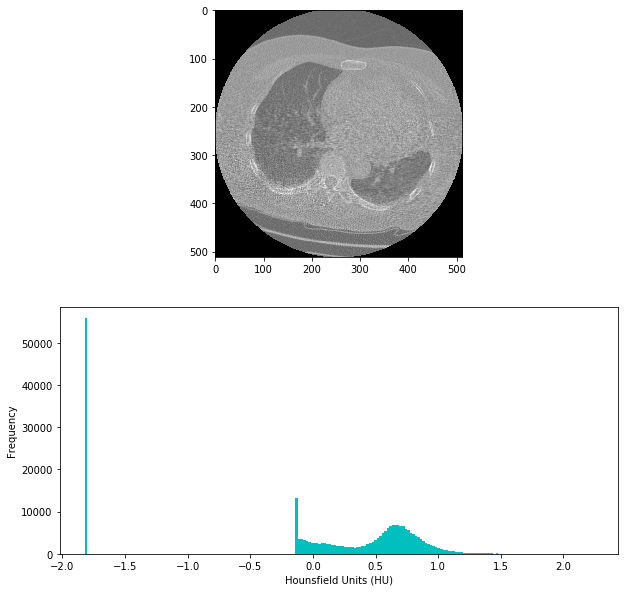

In [21]:
f,plots=plt.subplots(2,1,figsize=(10,10))
plots[0].imshow(img, cmap='gray')
plots[1].hist(img.flatten(), bins=200, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

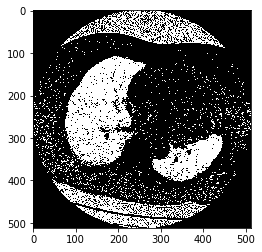

In [24]:
middle = img[100:400,100:400] 
mean = np.mean(middle)  
max = np.max(img)
min = np.min(img)
#move the underflow bins
img[img==max]=mean
img[img==min]=mean
kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = np.mean(centers)
thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image
plt.imshow(thresh_img,cmap='gray')

0.46143011617168